In [1]:
%run /Users/denais/Documents/Projects/scripts/init.ipy

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
# Read data
lincs_dataframe = pd.read_table('../data/lincs_dataframe.txt').set_index('ldplink')
lincs_dataframe.head()

,smallmolecule,technologies,cellline
ldplink,,,
http://lincsportal.ccs.miami.edu/datasets/#/view/EDS-1001,Seliciclib,Fluorescence imaging,PL4
http://lincsportal.ccs.miami.edu/datasets/#/view/EDS-1001,Seliciclib,Fluorescence imaging,TASK1
http://lincsportal.ccs.miami.edu/datasets/#/view/EDS-1001,Seliciclib,Fluorescence imaging,22RV1
http://lincsportal.ccs.miami.edu/datasets/#/view/EDS-1001,Seliciclib,Fluorescence imaging,DU 145
http://lincsportal.ccs.miami.edu/datasets/#/view/EDS-1001,Seliciclib,Fluorescence imaging,VCaP


In [29]:
counts = {x: lincs_dataframe.groupby(x).size().rename('count').sort_values(ascending=False).to_frame() for x in lincs_dataframe.columns}

### Barplots

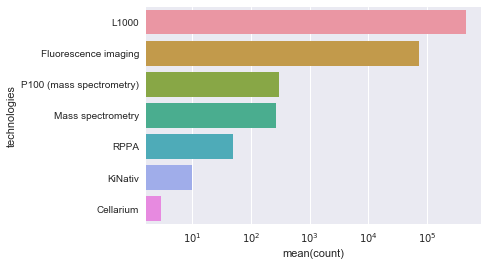

In [30]:
var = 'technologies'
g = sns.barplot(x="count", y=var, data=counts[var].reset_index().head(50))
g.set_xscale('log')

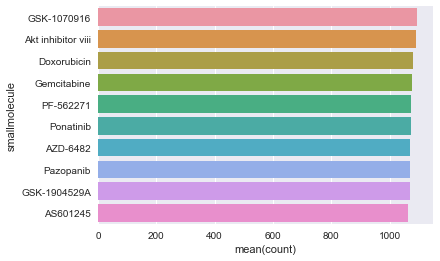

In [31]:
var = 'smallmolecule'
g = sns.barplot(x="count", y=var, data=counts[var].reset_index().head(10))

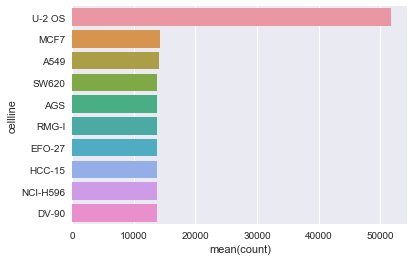

In [32]:
var = 'cellline'
g = sns.barplot(x="count", y=var, data=counts[var].reset_index().head(10))

## Paired Barcharts

In [117]:
paired_counts = {x: lincs_dataframe.drop(list(set(lincs_dataframe.columns)-set([x]))[0], axis=1).drop_duplicates().groupby(x).size().rename(list(set(lincs_dataframe.columns)-set([x]))[1]).to_frame().merge(lincs_dataframe.drop(list(set(lincs_dataframe.columns)-set([x]))[1], axis=1).drop_duplicates().groupby(x).size().rename(list(set(lincs_dataframe.columns)-set([x]))[0]).to_frame(), left_index=True, right_index=True) for x in lincs_dataframe.columns}

### Cell Line

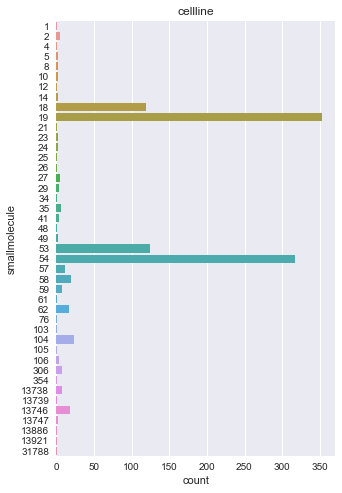

In [122]:
var = 'cellline'
fig, ax = plt.subplots(figsize=(5,8))
plt.title(var)
g = sns.countplot(y="smallmolecule", data=paired_counts[var])

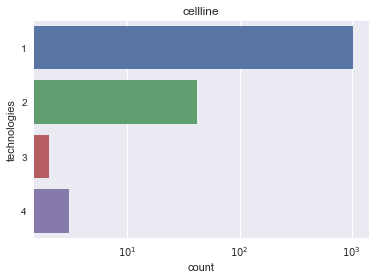

In [121]:
g = sns.countplot(y="technologies", data=paired_counts[var])
plt.title(var)
g.set_xscale('log')

### Small molecules

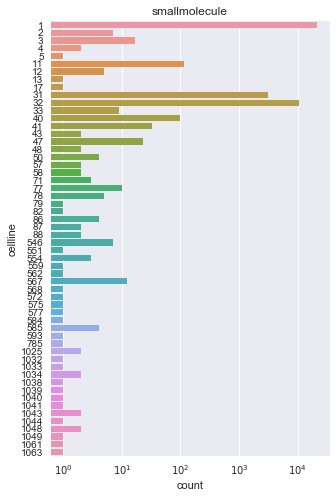

In [125]:
var = 'smallmolecule'
fig, ax = plt.subplots(figsize=(5,8))
g = sns.countplot(y="cellline", data=paired_counts[var])
plt.title(var)
g.set_xscale('log')

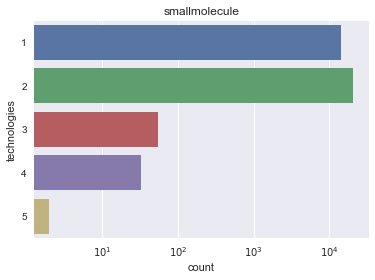

In [126]:
g = sns.countplot(y="technologies", data=paired_counts[var])
plt.title(var)
g.set_xscale('log')

##### Technologies

,cellline,smallmolecule
technologies,,
Fluorescence imaging,1075,30429
L1000,41,25535
P100 (mass spectrometry),4,105
Mass spectrometry,3,90
KiNativ,5,9
RPPA,10,5
Cellarium,1,3


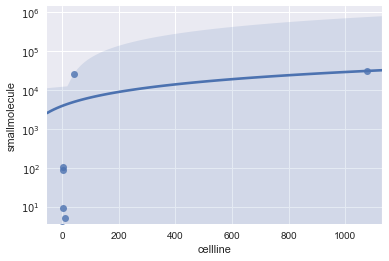

In [136]:
var = 'technologies'
g = sns.regplot(x="cellline", y="smallmolecule", data=paired_counts[var])
g.set_yscale('log')
paired_counts[var].sort_values('smallmolecule', ascending=False)

### Datasets

In [151]:
dataset_counts = {x: lincs_dataframe.reset_index().drop(list(set(lincs_dataframe.columns)-set([x])), axis=1).drop_duplicates().groupby(x).size().rename('datasets').sort_values(ascending=False).to_frame() for x in lincs_dataframe.columns}

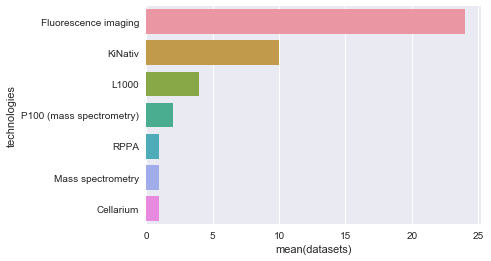

In [157]:
var = 'technologies'
g = sns.barplot(x="datasets", y=var, data=dataset_counts[var].reset_index().head(50))
# g.set_xscale('log')

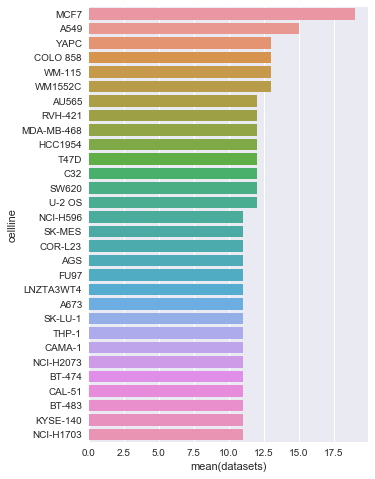

In [162]:
var = 'cellline'
fig, ax = plt.subplots(figsize=(5,8))
g = sns.barplot(x="datasets", y=var, data=dataset_counts[var].reset_index().head(30))
# g.set_xscale('log')

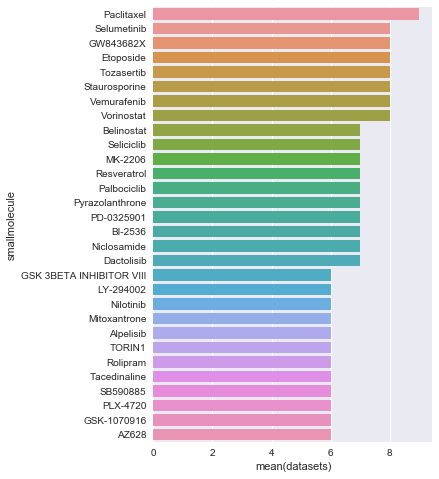

In [163]:
var = 'smallmolecule'
fig, ax = plt.subplots(figsize=(5,8))
g = sns.barplot(x="datasets", y=var, data=dataset_counts[var].reset_index().head(30))
# g.set_xscale('log')

In [177]:
lincs_dataframe.reset_index().query('cellline=="MCF7"').drop('smallmolecule', axis=1).drop_duplicates().groupby(['cellline', 'technologies']).size().sort_values(ascending=False).rename('datasets').to_frame()

datasets
cellline technologies                      
MCF7     Fluorescence imaging            13
         L1000                            3
         P100 (mass spectrometry)         2
         Mass spectrometry                1

In [179]:
lincs_dataframe.reset_index().query('smallmolecule=="Paclitaxel"').drop('cellline', axis=1).drop_duplicates().groupby(['smallmolecule', 'technologies']).size().sort_values(ascending=False).rename('datasets').to_frame()

datasets
smallmolecule technologies                  
Paclitaxel    Fluorescence imaging         7
              L1000                        2